# IMB Sendrecv performance comparison

In [11]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,12)
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})

In [12]:
import sys
sys.path.append('../../../python-modules')

In [13]:
from utilities import filemanip

In [14]:
from synthanalysis import imb

In [15]:
benchmark = "Sendrecv"
systems = ['ARCHER_CrayMPICH', 'Cirrus_IMPI18', 'Cirrus_MPT218', 'Fulhame_OMPI4', 'Fulhame_MVAPICH231', 'Fulhame_HMPT220', 'Isambard_CrayMPICH776']
nodelist = [1, 2, 4, 8, 16, 32]
imb_perf = {}
for system in systems:
    tdict = {}
    for nodes in nodelist:
        stem = 'IMB_{0}_{1}nodes'.format(benchmark, nodes)
        imbfiles = filemanip.get_filelist('../results/' + system, stem)
        if len(imbfiles) > 0:
            imb_dict = imb.get_perf_dict(imbfiles[0], nodes)
            tdict.update(imb_dict)
    imb_perf[system] = tdict

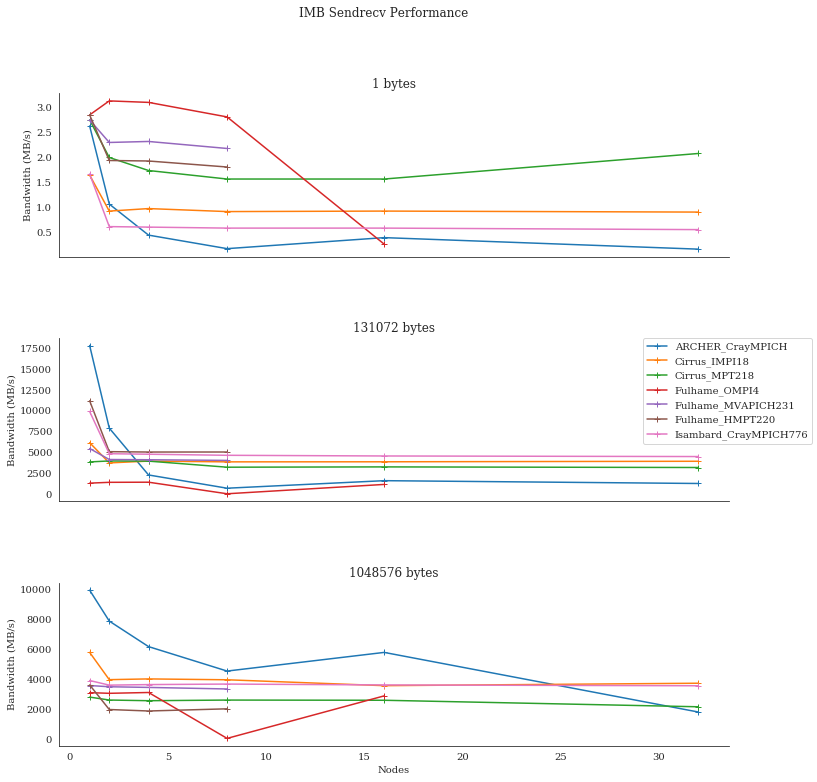

In [16]:
sizelist = [1, 131072, 1048576]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} Performance'.format(benchmark))
fig.subplots_adjust(hspace=0.5)
for ax, size in zip(axes.flatten(), sizelist):
    for system in systems:
        ax.plot(nodelist, imb.get_node_scaling(nodelist, size, imb_perf[system]), '-+', label=system)
        ax.set(title="{0} bytes".format(size), ylabel="Bandwidth (MB/s)")
        handles, labels = ax.get_legend_handles_labels()
        sns.despine()
plt.xlabel("Nodes")
fig.legend(handles, labels, loc='center right')

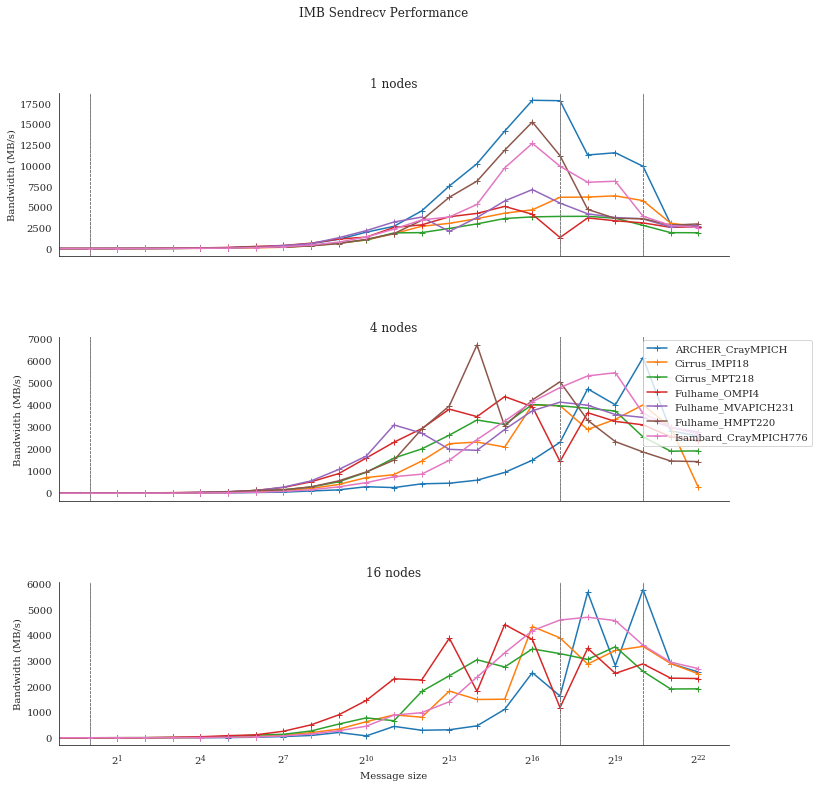

In [17]:
nodelist = [1, 4, 16]
sizelist = [0,
            1,
            2,
            4,
            8,
           16,
           32,
           64,
          128,
          256,
          512,
         1024,
         2048,
         4096,
         8192,
        16384,
        32768,
        65536,
       131072,
       262144,
       524288,
      1048576,
      2097152,
      4194304]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} Performance'.format(benchmark))
fig.subplots_adjust(hspace=0.5)
for ax, nodes in zip(axes.flatten(), nodelist):
    for system in systems:
        ax.plot(sizelist, imb.get_size_scaling(sizelist, nodes, imb_perf[system]), '-+', label=system)
        ax.set(title="{0} nodes".format(nodes), ylabel="Bandwidth (MB/s)")
        ax.axvline(x=1, c='gray', ls='--', lw=0.75)
        ax.axvline(x=131072, c='gray', ls='--', lw=0.75)
        ax.axvline(x=1048576, c='gray', ls='--', lw=0.75)
        handles, labels = ax.get_legend_handles_labels()
        sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
fig.legend(handles, labels, loc='center right')

In [18]:
baseline = 'ARCHER_CrayMPICH'
systems = ['Cirrus_IMPI18', 'Cirrus_MPT218', 'Fulhame_OMPI4', 'Fulhame_MVAPICH231', 'Fulhame_HMPT220', 'Isambard_CrayMPICH776']
nodelist = [1, 2, 4, 8, 16, 32]
sizelist = [0,
            1,
            2,
            4,
            8,
           16,
           32,
           64,
          128,
          256,
          512,
         1024,
         2048,
         4096,
         8192,
        16384,
        32768,
        65536,
       131072,
       262144,
       524288,
      1048576,
      2097152,
      4194304]
print("IMB {0} performance relative to {1}".format(benchmark, baseline))
imb_ratio = imb.analyse_perf_matrix(baseline, systems, nodelist, sizelist, imb_perf, invert=False)           

IMB Sendrecv performance relative to ARCHER_CrayMPICH
            #nodes
      #bytes         1         2         4         8        16        32
Cirrus_IMPI18
           0      0.00      0.00      0.00      0.00      0.00      0.00
           1      0.63      0.87      2.18      5.11      2.33      5.35
           2      0.67      0.92      2.26      4.18      1.84      7.00
           4      0.65      0.81      2.04      2.60      1.25      5.59
           8      0.64      0.71      2.38      2.57      2.66      3.34
          16      0.64      0.89      2.32      2.51      5.57     16.60
          32      0.63      0.77      2.61      2.96      3.03      5.53
          64      0.59      0.78      2.08      5.46      2.18      9.93
         128      0.51      0.73      2.54      6.15      2.16      4.55
         256      0.58      0.71      2.15      3.10      2.20     17.25
         512      0.60      0.70      2.62      4.73      1.64      7.87
        1024      0.52      0.79     

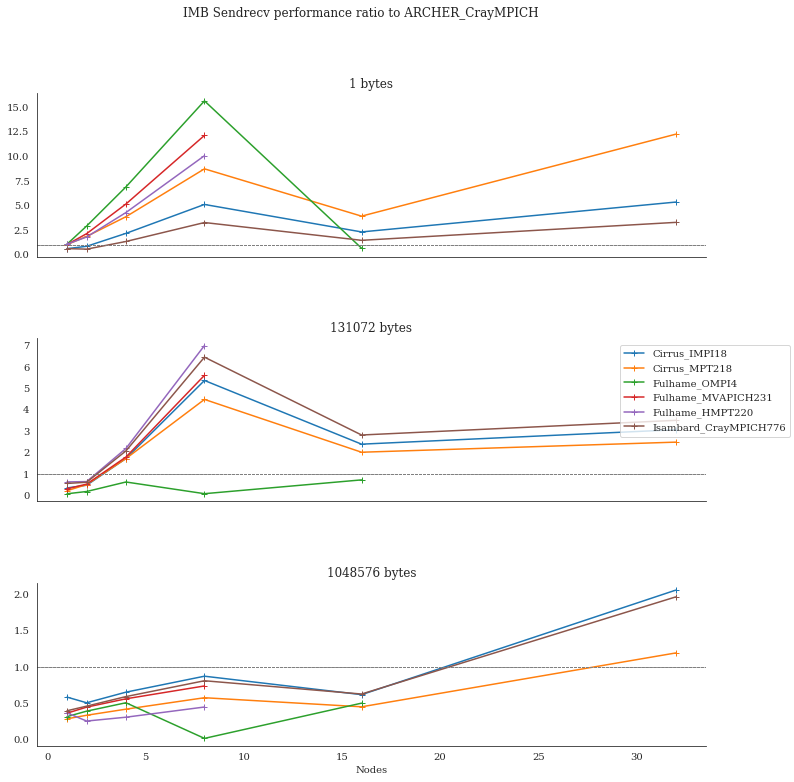

In [19]:
sizelist = [1, 131072, 1048576]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} performance ratio to {1}'.format(benchmark, baseline))
fig.subplots_adjust(hspace=0.5)
for ax, size in zip(axes.flatten(), sizelist):
    for system in systems:
        ax.plot(nodelist, imb.get_node_scaling(nodelist, size, imb_ratio[system]), '-+', label=system)
        ax.axhline(y=1, c='gray', ls='--', lw=0.75)
        ax.set(title="{0} bytes".format(size))
        handles, labels = ax.get_legend_handles_labels()
        sns.despine()
plt.xlabel("Nodes")
fig.legend(handles, labels, loc='center right')

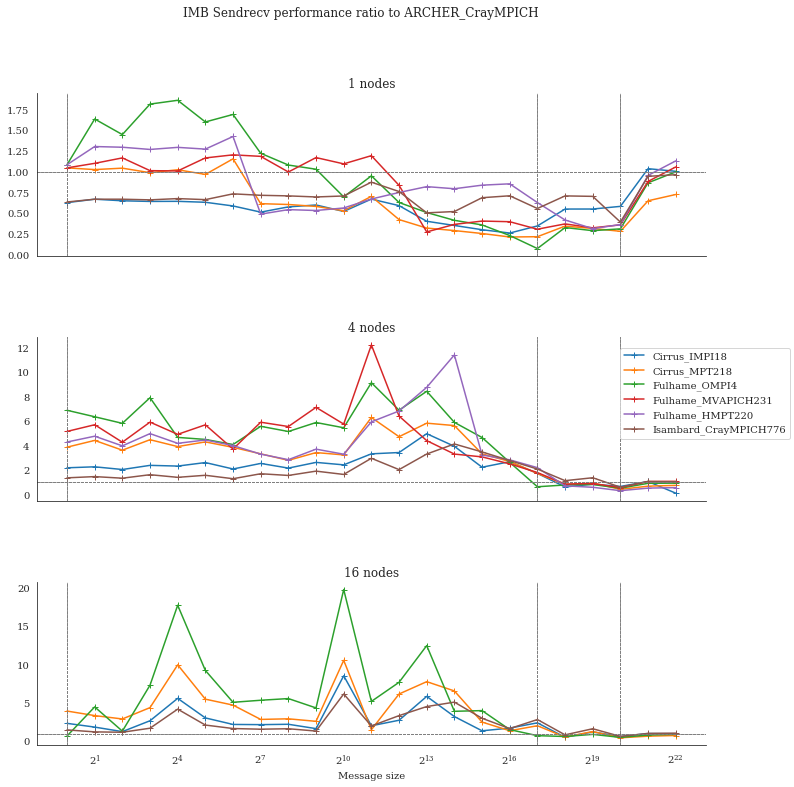

In [20]:
nodelist = [1, 4, 16]
sizelist = [0,
            1,
            2,
            4,
            8,
           16,
           32,
           64,
          128,
          256,
          512,
         1024,
         2048,
         4096,
         8192,
        16384,
        32768,
        65536,
       131072,
       262144,
       524288,
      1048576,
      2097152,
      4194304]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} performance ratio to {1}'.format(benchmark, baseline))
fig.subplots_adjust(hspace=0.5)
for ax, nodes in zip(axes.flatten(), nodelist):
    for system in systems:
        ax.plot(sizelist, imb.get_size_scaling(sizelist, nodes, imb_ratio[system]), '-+', label=system)
        ax.axhline(y=1, c='gray', ls='--', lw=0.75)
        ax.axvline(x=1, c='gray', ls='--', lw=0.75)
        ax.axvline(x=131072, c='gray', ls='--', lw=0.75)
        ax.axvline(x=1048576, c='gray', ls='--', lw=0.75)
        ax.set(title="{0} nodes".format(nodes))
        handles, labels = ax.get_legend_handles_labels()
        sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
fig.legend(handles, labels, loc='center right')